``` py

!pip install takeHomeTest
import takeHomeTest

!pip install time
from time import oneWeek as panic

panic.dump(takeHomeTest)


print("Welcome to your take home final!\n")
```





## ------------------------------------------- The Legend of Python --------------------------------------------
**Lore**

In the Kingdom of Pyrovia, all nations once traded in harmony. But since the Shattering of the Global APIs, the knowledge of currency exchange — locked away in XML scrolls — has scattered across the timelines. These scrolls reside in a mysterious repository known only as floatrates.com.

The High Council of Programmers has summoned you (and only you), young code-wielder, to begin your final trial. It is divided into 2 parts.
* Quest 1 (50xp): Retrieving the scrolls of time - Threading and Json save and parsing
* Quest 2 (50xp): Decipher the scrolls - Perform EDA on the data.

------ ------ ------ ------ Extra credit ------ ------ ------ ------
* Side Quest 1 (10xp*): Lay down seeds for those that follow - create error logs
* Side Quest 2 (10xp*): The Quest of reflection  - Use profiling on your code to fully understand it

*any points over 100% will be rolled over into your final grade.

I may not have time to run all of your code so make sure you very clearly take notes and communicate successes, issues, and lessons learned.
Please stay off Chat GPT and stack overflow (and like). You should have most everything you need in the notes.

--------------------------------------------
# Quest 1 (50 xp): Retrieving the Scrolls of Time
Retrieve historical exchange rate data from floatrates.com for one of the (Ideally randomly pick) 52 available currencies, starting from the first record on May 4, 2011, until the present day.

- You may store the data as-is in XML, or convert it to JSON, you may use the supplied code below as a starter.

- Organize each currency into its own directory.

- Ensure your code is modular, maintainable, and robust against timeouts or malformed entries.

## Notes from the Grand Master
* Threading is your ally. But do not burn out your ally as they have limited resources. You may use the threading or multi-core to parallelize downloads — but mind the server’s load. Around 10 threads is wise.
    - You should have around 5040 queries.

* XML Scrolls is a new and unfamiliar beast. Therefore takeing on this beast will wield 5 extra experience points. You will not be penalized for choosing to use JSON

*  Use the Save. Nothing is worse than losing experience you have already gained. Save the raw XML (or converted JSON) using timestamped (in my example below) files so you do not need to look it up again. Ie. If you put in a start date and your program has already read that data it should not pull that date again. (it would be a good idea to delete your data and run it top to bottom before final submission)

* Design gracefully. Structure your project with clear modules: downloader.py, parser.py, and so on.

* Log your quest progress in your quest book to show the Grand Master what you learned this is very important.


--------------------------------------------

In [ ]:
!pip install xmltodict

In [ ]:
pip install seaborn

In [1]:
rates = ["EUR", "GBP", "USD", "DZD", "AUD", "BWP", "BND", "CAD", "CLP", "CNY", "COP", "CZK", "DKK", "HUF", "ISK", "INR", "IDR", "ILS", "KZT", "KRW", "KWD", "LYD", "MYR", "MUR", "NPR", "NZD", "NOK", "OMR", "PKR", "PLN", "QAR", "RUB", "SAR", "SGD", "ZAR", "LKR", "SEK", "CHF", "THB", "TTD"]
ratesForBase = [r for r in rates if r != "USD" and r != "EUR" and r != "GBP"]

In [5]:
import requests
import random
from datetime import datetime, timedelta
import os
import threading
from concurrent.futures import ThreadPoolExecutor
import xmltodict
import json
import logging



startDate = datetime(2025,5,4).date()
today = datetime.utcnow().date()
base = random.choice(ratesForBase)
OUTPUT_DIR = f"data/{base}"
lock = threading.Lock()

#set up logges for quest 1
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', filename= 'quest1_progress.log')
logging.info("satrting Quest 1 excution.")

def fetch_and_save(date):
    date_str = date.strftime("%Y-%m-%d")
    file_path= os.path.join(OUTPUT_DIR, f"{date_str}_{base}.json")

    if os.path.exists(file_path):
        logging.info(f"Skipping download for {base} onn {date_str}.json")
        return date_str
    
    url = (
        f"https://www.floatrates.com/historical-exchange-rates.html"
        f"?operation=rates&pb_id=1775&page=historical"
        f"&currency_date={date_str}&base_currency_code={base}"
        f"&format_type=xml"
    )
    #try-except block for error handling
    try:
        logging.info(f"Attempting to download data for {base} on {date_str} from {url}")
        r = requests.get(url, timeout=10)
        r.raise_for_status()

        xml_data = r.text

        #check for empty or malformed XML response
        if not xml_data.strip():
            logging.warning(f"Recevied empty response for {base} on {date_str}. Skipping save.")
            return None

        data_dict = xmltodict.parse(r.text)
        json_data = json.dumps(data_dict, indent=4)

        #only writes if new and handle for errors
        os.makedirs(OUTPUT_DIR, exist_ok=True)
        if not os.path.exists(file_path):
            with lock, open (file_path, "w", encoding="Utf-8") as f:
                f.write(json_data)
            logging.info(f"Successfully download and saved data for {base} on {date_str} to {file_path}")
        else:
            logging.info(f"File already exists, skippin writing for {base} on {date_str}.")
        return date_str
    except requests.exceptions.RequestException as e:
        logging.error(f"Failed to download data for {base} on {date_str} from {url}: {e}")
        return None
    except xmltodict.expat.ExpatError as e:
        logging.error(f"An unexpedted error occured for {base} on {date_str}: {e}")
        return None
    
#main function
def run_quest1():
    logging.info(f"Randomly chosen base currency for Quest 1: {base}")
    logging.info(f"Data will be saved  to: {OUTPUT_DIR}")
# build list of all dates
dates = [startDate + timedelta(days=i)
         for i in range((today-startDate).days+1)]
logging.info(f"check/downloads dtaes: {len(dates)}")

successful_count =  0
with ThreadPoolExecutor(max_workers=10) as exe:
    for d in exe.map(fetch_and_save, dates):
        print("Saved", d)
        successful_count += 1
logging.info(f"Quest 1 completed for {base}. Successfully processed {successful_count} out of {len(dates)} date.")
print(f"\nQuest q download process complete for {base}.")

if __name__ == "__main__":
    run_quest1()


C:\Users\Owner\AppData\Local\Temp\ipykernel_34536\4029501118.py:14: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  today = datetime.utcnow().date()


Saved 2025-05-04
Saved 2025-05-05
Saved 2025-05-06
Saved 2025-05-07
Saved 2025-05-08
Saved 2025-05-09
Saved 2025-05-10
Saved 2025-05-11
Saved 2025-05-12
Saved 2025-05-13
Saved 2025-05-14
Saved 2025-05-15
Saved 2025-05-16
Saved 2025-05-17
Saved 2025-05-18
Saved 2025-05-19
Saved 2025-05-20
Saved 2025-05-21

Quest q download process complete for SEK.


--------------------------------------------
# Quest 2 (50 XP): Decipher the scrolls – Exploratory Data Analysis

Once the scrolls have been retrieved their knowledge remains unrefined there patterns hidden, trends veiled. Your task now is to become the Seer of Exchange, the one who can read the currencies’ fates through the lens of data.
8
Perform Exploratory Data Analysis (EDA) on the dataset you collected in Quest 1.
- Aggregate and visualize trends in exchange rate over time for at least 5 major currencies (e.g., USD, EUR, GBP, JPY, CNY).

- Identify periods of volatility — perhaps during economic upheaval

- Generate at least multiple visualizations using seaborn:

- Log your quest progress in your quest book to show the Grand Master what you learned this is very important. some examples of observations are:
    - Anomalies, seasonal patterns, or economic events
    - Currencies with the most/least stability
    - Any interesting correlations between currencies


## Notes from the Grand Master
- All of your work in this section should be in your jupyter notebook.

- It might be helpful to use  google to reveal how economic events affected currency. Use Google News or economic calendars to correlate real-world events to exchange rate spikes or dips.


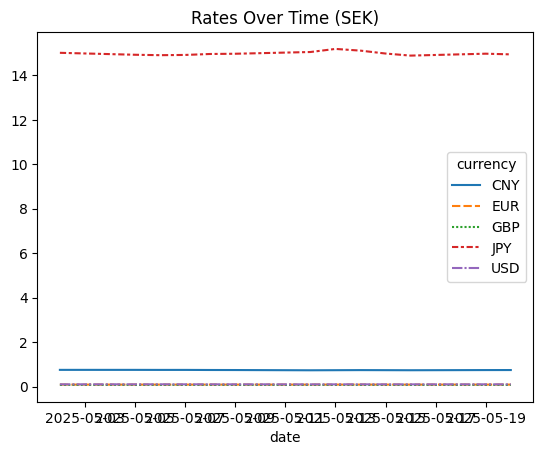

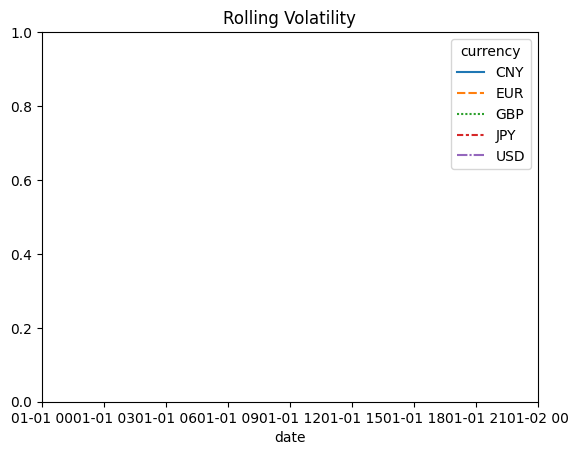

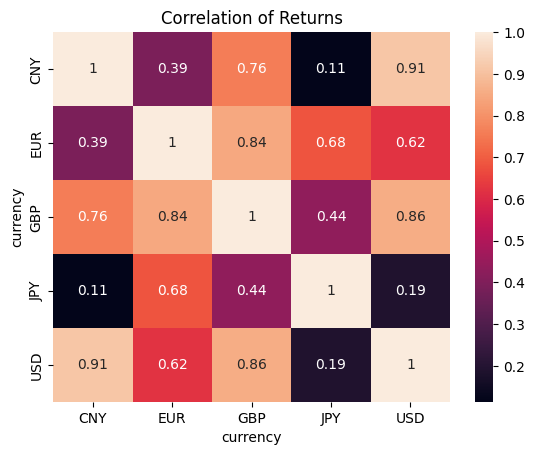

In [6]:
import json, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from glob import glob
import numpy as np 

def run_quest2():
    # load & flatten
    files = glob("data/SEK/*.json")

    #check id any JSON files were found
    if not files:
        print("No JSON files found. Ensure quest1 is complted")
        return
    
    #Attempt to load the base currency from the first file
    try:
        base = json.load(open(files[0]))["channel"]["baseCurrency"]
    except(json.JSONDecodeError,KeyError) as e:
        print(f"Error loading base currecny: {e}")
        return

    # Initialize a list to store flattened currency records
    records  = []
    for f in files:
        ch    = json.load(open(f))["channel"]
        date  = pd.to_datetime(ch["pubDate"].split(",")[-1].strip())
        items = ch["item"] if isinstance(ch["item"], list) else [ch["item"]]
        records += [
            (date, it["targetCurrency"], float(it["exchangeRate"].replace(",", "")))
            for it in items if it["targetCurrency"] in ["USD","EUR","GBP","JPY","CNY"]
    ]
    
    if not records:
        print("No valid curecny found")
        return

    # create a DataFrame, pivot it to have  dates as index and currencies as columns, and sort by date 
    df = pd.DataFrame(records, columns=["date","currency","rate"]) \
        .pivot_table(index="date", columns="currency", values="rate", aggfunc="mean").sort_index()

    # 1) trend
    sns.lineplot(data=df)
    plt.title(f"Rates Over Time ({base})")
    plt.show()

    # 2) volatility
    ret = df.pct_change()
    sns.lineplot(data=ret.rolling(365).std())
    plt.title("Rolling Volatility")
    plt.show()

    #calculation for observation variables
    vol = ret.std()

    most_stable = vol.idxmin()
    least_stable = vol.idxmax()

    corr_matrix = ret.corr()
    corr_series = corr_matrix.unstack()
    unique_corr = corr_series[corr_series.index.get_level_values(0)< corr_series.index.get_level_values(1)]

    min_corr_pair = unique_corr.idxmin()
    min_corr = unique_corr.min()
    min_a, min_b = min_corr_pair[0], min_corr_pair[1]

    max_corr_pair = unique_corr.idxmax()
    max_corr = unique_corr.max()
    max_a, max_b = max_corr_pair[0], max_corr_pair[1]


    # 3) correlation
    sns.heatmap(ret.corr(), annot=True)
    plt.title("Correlation of Returns")
    plt.show()

    # log observations to TXT
    lines = []
    lines.append(f"base currency: {base}\n")
    lines.append(f"least volatile: {most_stable} (σ={vol[most_stable]:.4f})")
    lines.append(f"Most volatile: {least_stable} (σ={vol[least_stable]:.4f}")
    lines.append("correlations:")
    lines.append(f"Highest: {max_a} & {max_b} = {max_corr:.2f}")
    lines.append(f"Lowest: {min_a} & {min_b} = {min_corr:.2f}\n")
    with open("quest_observations.txt", "w", encoding="utf-8") as f:
        f.write("\n".join(lines)) 

if __name__ == "__main__":
    run_quest2()


--------------------------------------------


# Side Quest 1 (10 XP): Lay Down Seeds for Those Who Follow – Logging

Even the greatest explorer must leave breadcrumbs for those who walk the path after them. Here you will construct an error log system, a journal that captures both triumphs and catastrophes.

Implement a robust logging system throughout your codebase to monitor:
- Successful currency downloads
- Parsing attempts and failures
- Skipped downloads (due to saved data or time out)
- Connection errors

## Notes from the Grand Master
- You do not need to do log hierarchy
- Use log levels: INFO for progress, WARNING for skips, ERROR for failures



--------------------------------------------


# Side Quest 2 (10 XP): The quest of Reflection – Code Profiling

The final challenge for any Adventure is introspection — learning the nature of one's own power. In this side quest, you will profile your code, to discover its bottlenecks, inefficiencies, and optimization opportunities.

Use profiling tools to evaluate:
- Which functions are taking the most time
- How threads/processes are behaving
- Whether I/O is a bottleneck

*A random vendor appears* His invintory shows:
- A Profiler function - cProfile or Profile
- A time module - timeit for micro-benchmarks
- A line profiler - line_profiler